## PCA

IMPORTANTE:

* Feature selection: filtra columnas, no las transforma, se queda con las mejores columnas pero no las modifica.

* PCA: no filtra columna, las transforma. Es decir, reduce el número de columnas realizando transformaciones que combinan múltiples columnas. Se suele usar para reducción de la dimensionalidad, es decir, quedarse con menos columnas pero con la información más relevante. Usos:
    * Reducir número de columnas
    * Ayuda a visualizar datos en menos dimensiones por ejemplo 2d o 3d

El **Análisis de Componentes Principales (PCA)** es una técnica de reducción de la dimensión que busca encontrar las **direcciones (componentes principales)** que representan mejor la variabilidad de los datos. 

PCA busca las proyecciones que retienen la mayor **varianza** posible.

1. Suponiendo que tenemos un dataset con muchas variables (columnas en la X).  
2. *PCA* encuentra una primera dirección (vector) en el espacio de tus variables, que es la que explica la máxima **varianza** de los datos.  
3. Después, encuentra una segunda dirección que sea ortogonal (perpendicular) a la primera, pero que también explique la máxima varianza restante.  
4. Y así sucesivamente...

El PCA analiza cómo varían las variables entre sí. Para ello, se calcula la **covarianza** de todas las variables, lo que nos ayuda a entender qué variables "se mueven juntas" y cuáles son independientes. Esta información se organiza en una matriz de covarianza, que es como una tabla que resume todas estas relaciones.

* Cov > 0: Existe una relación positiva (cuando una variable aumenta, la otra tiende a aumentar).
* Cov < 0: Existe una relación negativa (cuando una variable aumenta, la otra tiende a disminuir).
* Cov ≈ 0: No hay relación lineal clara.

De esta forma, podemos proyectar los datos originales en un espacio de menor dimensión (por ejemplo, pasar de 50 variables a 2 o 3), reteniendo la máxima cantidad posible de información (varianza).

El papel de PCA es encontrar features altamente correlacionadas o duplicadas y crear un nuevo conjunto de features donde haya una correlación mínima entre las features o, en otras palabras, un conjunto de features con la máxima variación entre las features. Dado que la variación entre las features no depende de la salida, PCA no tiene en cuenta las etiquetas de salida.

Puntos clave de PCA: 

* Estandariza o normaliza siempre los datos antes de aplicar PCA, especialmente si las escalas de tus variables difieren mucho.
* Analiza la varianza explicada acumulada para decidir cuántas componentes retener.
* Considera IncrementalPCA si tu dataset es muy grande.
* Si tus datos presentan relaciones claramente no lineales, explora Kernel PCA.
* Para casos más avanzados, combina PCA con otros pasos en un Pipeline (por ejemplo, escalado + PCA + modelo) para asegurar un procesamiento reproducible.
* Si trabajas con muchas dimensiones (p.ej., imágenes), el PCA puede ser útil como preprocesamiento de compresión de la información.

- `pca.explained_variance_ratio_` nos indica la proporción de varianza que explica cada componente.  
- Con `n_components=2`, reducimos la dimensión original de 4 a 2.

Importante: es un método de aprendizaje NO supervisado, no usa la "y", trabaja solo con la "X".

Para modelado: nos interesa el menor número de componentes (n_components) que retenga la máxima varianza posible (pca.explained_variance_ratio_).

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) # no usa una "y" porque es aprendizaje no supervisado
X_pca[:3] # se observa que hay 2 columnas en vez de 4, y que han sido transformadas

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

In [9]:
print('Varianza explicada por cada componente:', pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.92461872 0.05306648]


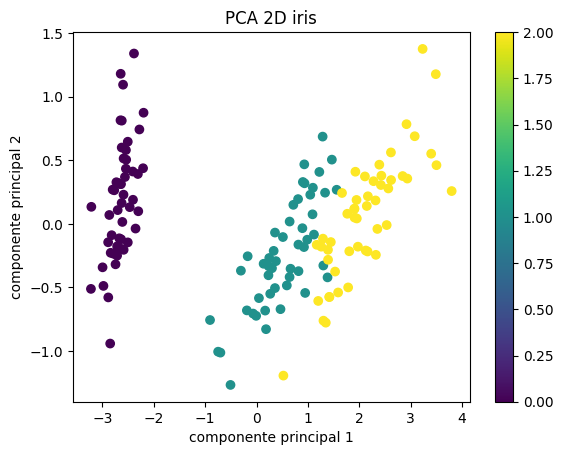

In [28]:
# scatterplot que muestra las dos componentes obtenidas del PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('componente principal 1')
plt.ylabel('componente principal 2')
plt.colorbar()
plt.title('PCA 2D iris');

## PCA 3D

In [19]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X) # no usa una "y" porque es aprendizaje no supervisado
print(X_pca[:3])
print('Varianza explicada por cada componente:', pca.explained_variance_ratio_)

[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]]
Varianza explicada por cada componente: [0.92461872 0.05306648 0.01710261]


In [22]:
import plotly.express as px

px.scatter_3d(
    x=X_pca[:, 0], # componente principal 1
    y=X_pca[:, 1], # componente principal 2
    z=X_pca[:, 2], # componente principal 3
    color=y,
    color_continuous_scale='viridis',
    title='PCA 3D iris',
    labels={
        'x': 'componente principal 1',
        'y': 'componente principal 2',
        'z': 'componente principal 3'
    }
)

In [30]:
import numpy as np

# mostrar varianza
pca = PCA() # no limito el numero de componentes para ver la varianza en todos
pca.fit(X)

varianza = np.cumsum(pca.explained_variance_ratio_)
                
print('varianza en cada componente', pca.explained_variance_ratio_)
print('varianza acumulada',varianza)

varianza en cada componente [0.92461872 0.05306648 0.01710261 0.00521218]
varianza acumulada [0.92461872 0.97768521 0.99478782 1.        ]


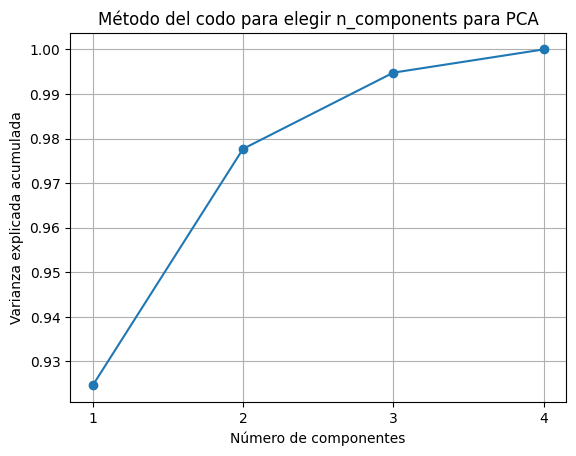

In [36]:
plt.plot(range(1, len(varianza) + 1), varianza, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title('Método del codo para elegir n_components para PCA')
plt.xticks(range(1, len(varianza) + 1))
plt.grid()

## PCA sobre dataset de 30 columnas

In [49]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer() # clasificación binaria
df = pd.DataFrame(data.data, columns = data.feature_names)
X = df 
y = data.target # 0 = maligno, 1 = benigno

In [38]:
pca = PCA()
pca.fit(X)
varianza = np.cumsum(pca.explained_variance_ratio_)
print('varianza en cada componente', pca.explained_variance_ratio_)
print('varianza acumulada',varianza)

varianza en cada componente [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473206e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577732e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849738e-10 1.27487508e-10 7.72682973e-11 6.28357719e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]
varianza acumulada [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971 0.99999989 0.99999996 0.99999998
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


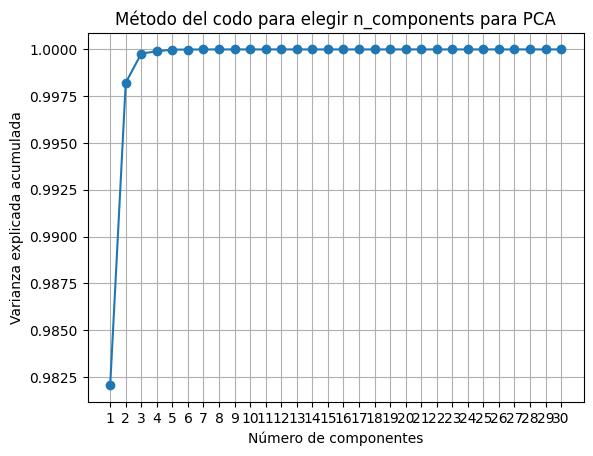

In [39]:
plt.plot(range(1, len(varianza) + 1), varianza, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title('Método del codo para elegir n_components para PCA')
plt.xticks(range(1, len(varianza) + 1))
plt.grid()

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Hemos visto que con 3 componentes explica casi toda la varianza
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression(max_iter=5000)
model.fit(X_train_pca, y_train)

print('accuracy train', model.score(X_train_pca, y_train))
print('accuracy test', model.score(X_test_pca, y_test))

accuracy train 0.9230769230769231
accuracy test 0.9736842105263158


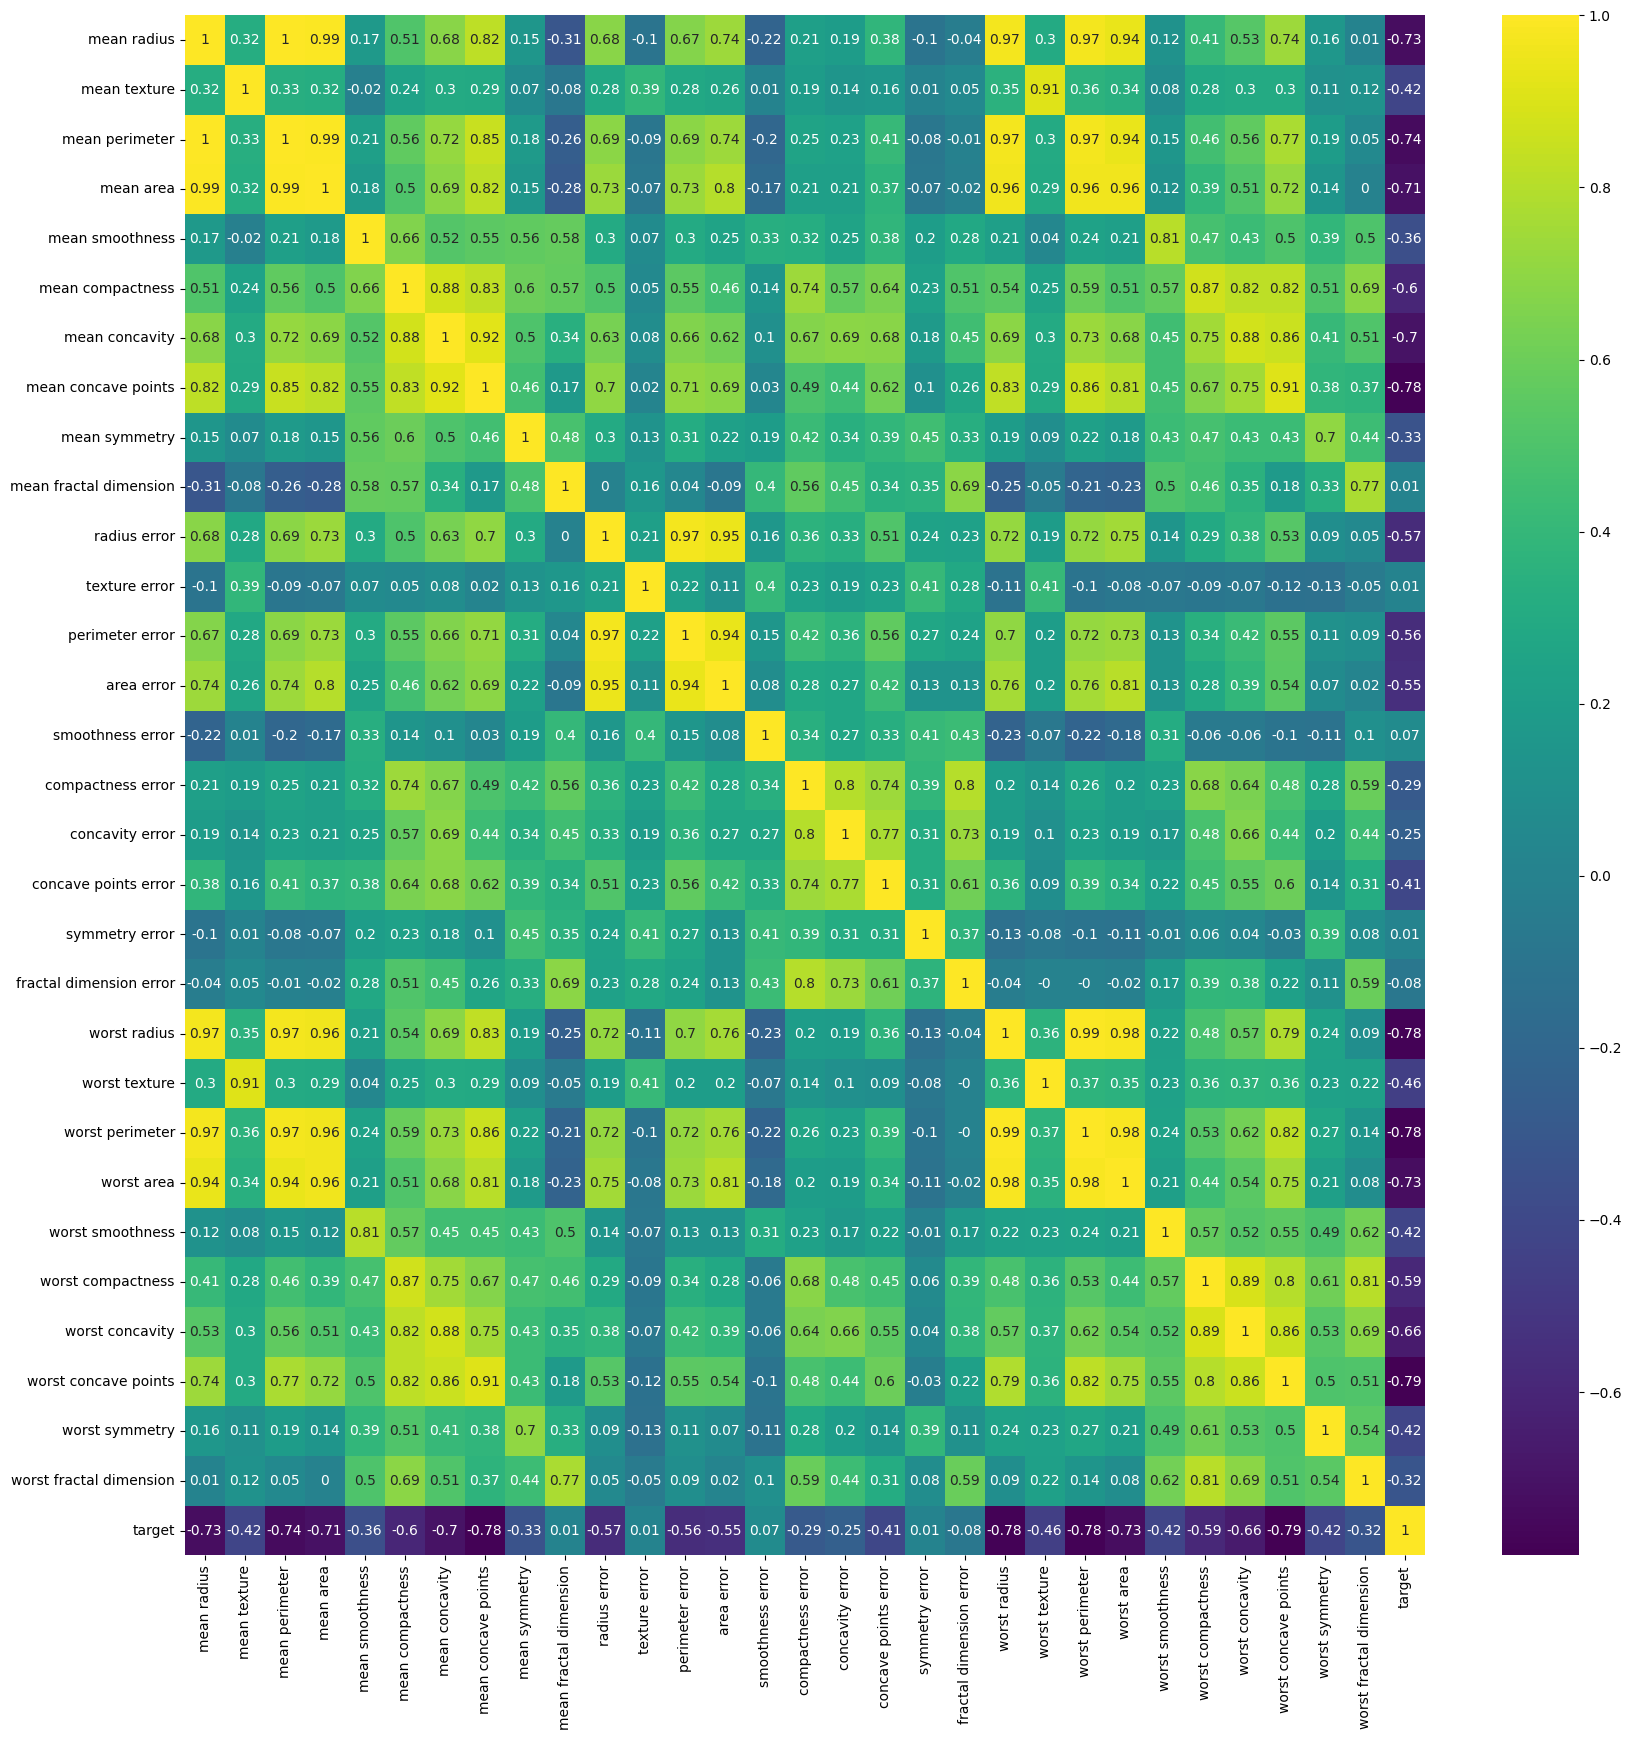

In [44]:
import seaborn as sns
df2 = df.copy()
df2['target'] = y
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr().round(2), annot=True, cmap='viridis');

Observamos que hay multicolinealidad, es decir, muchas columnas de la X están correlacionadas entre sí.

Por eso el PCA es capaz de retener casi toda la varianza del dataset en prácticamente solo 3 columnas porque como la mayoría son parecidas entre sí el PCA las transforma y es capaz de aprovechar lo mejor de cada una y convertirlo a componentes principales del PCA, en este caso hemos elegido 3 componentes porque el método del codo nos sugería que la máxima varianza ya estaba retenida en los 3 primeros componentes.

In [47]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

px.scatter_3d(
    x=X_pca[:, 0], # componente principal 1
    y=X_pca[:, 1], # componente principal 2
    z=X_pca[:, 2], # componente principal 3
    color=y,
    color_continuous_scale='viridis',
    title='PCA 3D breast cancer',
    labels={
        'x': 'componente principal 1',
        'y': 'componente principal 2',
        'z': 'componente principal 3'
    }
)

In [ ]:
# probar PCA 2d y 3d sobre digits